In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv("data.csv", sep="\t")

In [3]:
gdp = df['GDP'].to_numpy()
lex = (pd.to_numeric(df['LEX'].str.replace(',', '.'), errors='coerce'))\
    .to_numpy()
size = gdp.size
gdp_mean = np.mean(gdp)
lex_mean = np.mean(lex)
gdp_sd = np.std(gdp)
lex_sd = np.std(lex)
print("Observations: ", size)
print("GDP(mean, standard deviation): ", gdp_mean, gdp_sd)
print("LEX(mean, standard deviation): ", lex_mean, lex_sd)

Observations:  195
GDP(mean, standard deviation):  20872.102564102563 24179.09720483299
LEX(mean, standard deviation):  72.39435897435897 7.319704279746025


In [4]:
confidence_level = 0.95
dof = size - 1
alpha = (1 + confidence_level) / 2
critical_value = scipy.stats.t.ppf(alpha, dof)
gdp_moe = critical_value * gdp_sd / np.sqrt(size)
lex_moe = critical_value * lex_sd / np.sqrt(size)
gdp_confidence_interval = (gdp_mean - gdp_moe, gdp_mean + gdp_moe)
lex_confidence_interval = (lex_mean - lex_moe, lex_mean + lex_moe)
print("GDP 95% confidence interval: ", gdp_confidence_interval)
print("LEX 95% confidence interval: ", lex_confidence_interval)


GDP 95% confidence interval:  (17457.119132515552, 24287.085995689573)
LEX 95% confidence interval:  (71.36054581633697, 73.42817213238096)


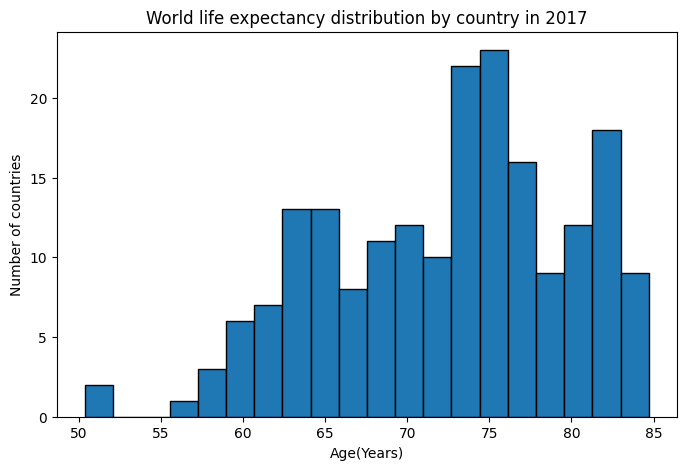

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(lex, bins=20, edgecolor='black')
plt.title("World life expectancy distribution by country in 2017")
plt.xlabel("Age(Years)")
plt.ylabel("Number of countries")
plt.savefig("lex_histo.png", dpi=300)
plt.show()

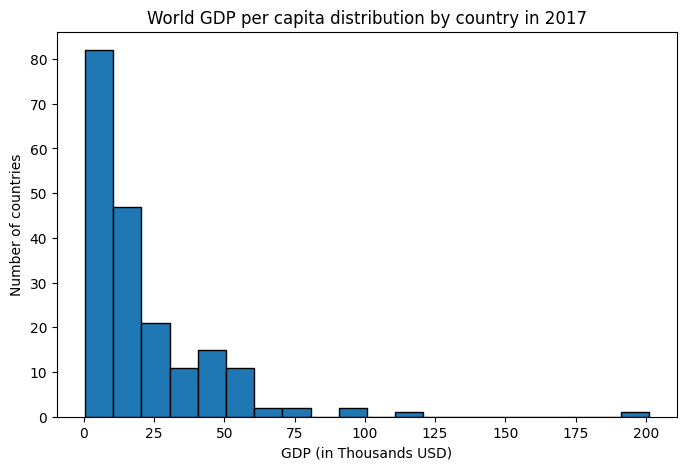

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(gdp/1000, bins=20, edgecolor='black')
plt.title("World GDP per capita distribution by country in 2017")
plt.xlabel("GDP (in Thousands USD)")
plt.ylabel("Number of countries")
plt.savefig("gdp_histo.png", dpi=300)
plt.show()

In [7]:
correl = np.corrcoef(gdp, lex)[0, 1]
print(correl)
slope, intercept = np.polyfit(gdp, lex, 1)
print(slope, intercept)

0.6402486572000062
0.00019382158053741545 68.34889506624556


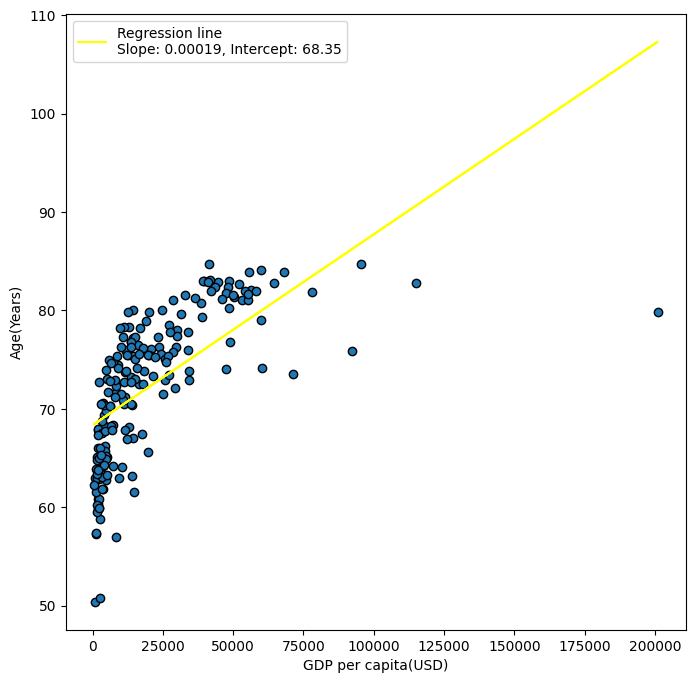

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(gdp, lex, edgecolor='black')
regression_line_label = f'Regression line\nSlope: {slope:.5f}, Intercept: {intercept:.2f}'
plt.plot(gdp, slope * gdp + intercept, label=regression_line_label, color="yellow")
plt.legend()
plt.xlabel("GDP per capita(USD)")
plt.ylabel("Age(Years)")
plt.savefig("scatterplot.png", dpi=300)
plt.show()

0.8380396098306463


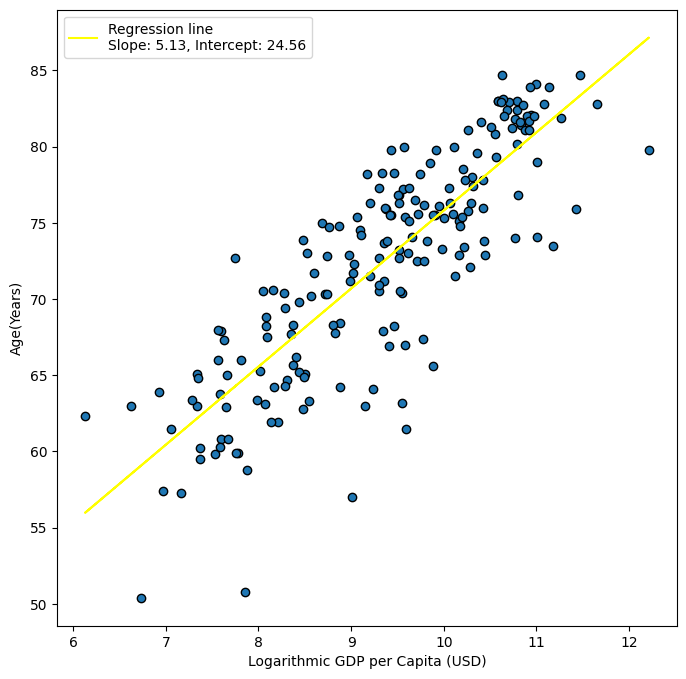

In [9]:
correl2 = np.corrcoef(np.log(gdp), lex)[0, 1]
print(correl2)
plt.figure(figsize=(8, 8))
plt.scatter(np.log(gdp), (lex), edgecolor='black')
slope2, intercept2 = np.polyfit(np.log(gdp), lex, 1)
regression_line_label = f'Regression line\nSlope: {slope2:.2f}, Intercept: {intercept2:.2f}'
plt.plot(np.log(gdp), slope2 * np.log(gdp) + intercept2, label=regression_line_label, color="yellow")
plt.legend()
plt.xlabel("Logarithmic GDP per Capita (USD)")
plt.ylabel("Age(Years)")
plt.savefig("scatterplot2.png", dpi = 300)
plt.show()